In [2]:
import numpy as np
import pandas as pd

In [3]:
#Read dataset in a structured form
df=pd.read_csv('data.csv')

In [8]:
#Random 5 values from sample

df.sample(5)

,target,text
4625,ham,Have you laid your airtel line to rest?
3717,ham,Ok im not sure what time i finish tomorrow but...
1379,ham,What does the dance river do?
803,spam,you are selected as
1250,ham,Hello-/@drivby-:0quit edrunk sorry iff pthis m...


In [6]:
#Renameing the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [5]:
df.sample(5)

,target,text
4046,ham,Well. Balls. Time to make calls
792,spam,You have an important customer service announc...
3680,ham,Studying. But i.ll be free next weekend.
3214,ham,Is ur paper today in e morn or aft?
925,ham,"Call me da, i am waiting for your call."


# 1. Data Cleaning

In [6]:
#Basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5625 non-null   object
 1   text    5625 non-null   object
dtypes: object(2)
memory usage: 88.0+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
#Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.
df['target']=encoder.fit_transform(df['target'])

In [9]:
# Head is used to see small series in the data set
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Check for missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
#Check for duplicate values
df.duplicated().sum()

415

In [12]:
#Remove duplicate vaalues and keeping first value as unique
df=df.drop_duplicates(keep='first')

In [13]:
#Recheck for duplicacy
df.duplicated().sum()

0

In [14]:
#Changed shape after removing duplicate value
df.shape

(5210, 2)

# 2. Exploratory Data Analysis

In [15]:
# Count number of ham and spam in data
df['target'].value_counts()

0    4516
1     694
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

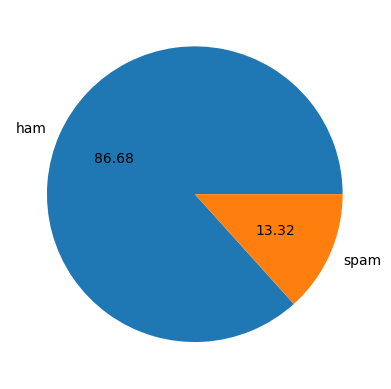

In [17]:
#Visualize number of ham and spam share. Upto 2 decimal number
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show

In [18]:
#Data is imbalanced as count of ham >> spam

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
df['num_characters']=df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#Number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5210.000000,5210.000000,5210.000000
mean,78.967179,18.498081,1.947601
std,58.403929,13.406420,1.359727
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,694.000000,694.000000,694.000000
mean,131.661383,26.523055,2.867435
std,38.465656,8.583612,1.487710
min,7.000000,1.000000,1.000000
25%,121.000000,23.000000,2.000000
50%,146.000000,28.000000,3.000000
75%,156.000000,32.000000,4.000000
max,306.000000,68.000000,8.000000


In [33]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

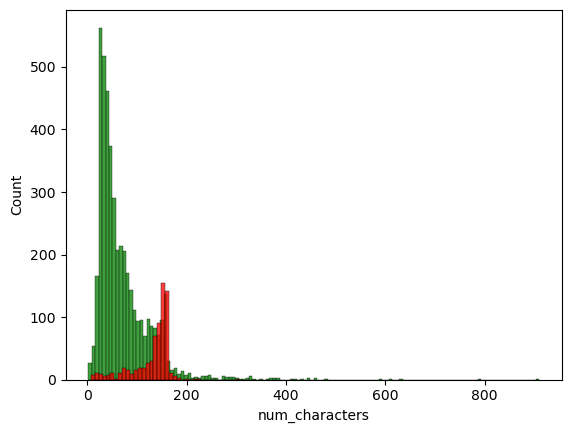

In [39]:
sns.histplot(df[df['target']==0]['num_characters'],color='green')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

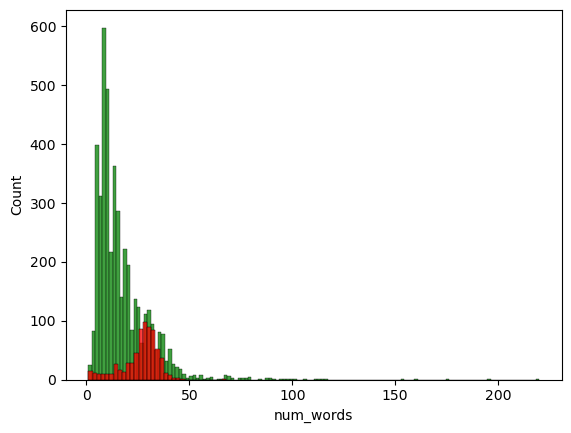

In [40]:
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')

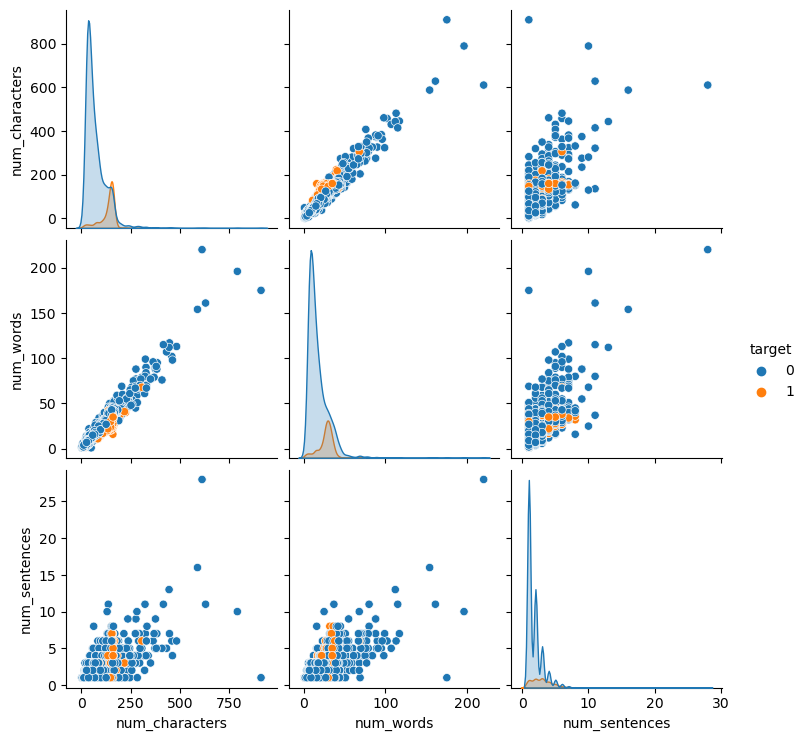

In [43]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

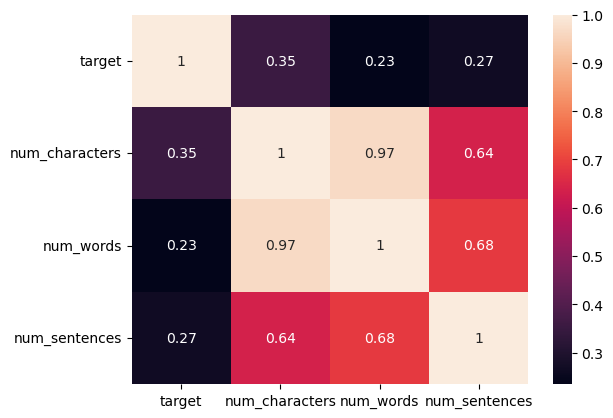

In [44]:
# Corelation brtween data
sns.heatmap(df.corr(),annot=True)#annot – an array of the same shape as data which is used to annotate the heatmap. 

# 3. Data Preprocessing

In [45]:
#Lower Case
#Tokenization
#Remove Special character
#Remove Stop words and punctuation
#Stemming

In [66]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [100]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [132]:
def transforme_text(text):
    text=text.lower() #Lower case
    text= nltk.word_tokenize(text) #Tokenization , text will be converted into a list
    
    y=[]
    for i in text:
        if i.isalnum(): #Removing special char
            y.append(i)
    
    text = y[:] #As list is a mutable data type, it can not be copied directly, we have to do cloning
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: #Remove Stop words and punctuation
            y.append(i)
                    
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
                 
    return " ".join(y)

In [134]:
transforme_text("I am preparing project on SPAM EMAIL CLASSIFICATION. Do you find it interesting?")

'prepar project spam email classif find interest'

In [136]:
df['transformed_text']=df['text'].apply(transforme_text)

In [137]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [118]:
# Top 30 spam words:
spam_list=[]
for msg in df[df['target']==1]['text'].tolist():
    for word in msg.split():
        spam_list.append(word)

In [121]:
from collections import Counter
pd.DataFrame(Counter(spam_list).most_common(30))

,0,1
0,to,518
1,a,313
2,your,176
3,for,166
4,the,162
5,call,159
6,you,158
7,or,154
8,2,150
9,is,139


# 4. Model Building

In [125]:
#In ML Naive bayes classification algo works best in textual data set.

# The input text must be a numerical value to train the model. Out target is numerical as 0 & 1 but input is not
#numerical, so we have to convert the text into vector/ we have to do vectorization.

# Vectorization method name - BOW(Countvectorizer), TF-IDF, wordtovec 

In [347]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf= TfidfVectorizer(max_features=2600)
#Among 6832 words we want to vectorize for only 2600 words to improve the model tranning

In [348]:
X= tfidf.fit_transform(df['transformed_text']).toarray() #Sparce vector converted to dence vector

In [349]:
X.shape

(5210, 2600)

In [350]:
y=df['target'].values

In [351]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [352]:
from sklearn.model_selection import train_test_split

In [353]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [354]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [355]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [356]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8570057581573897
[[765 131]
 [ 18 128]]
0.4942084942084942


In [357]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9798464491362764
[[895   1]
 [ 20 126]]
0.9921259842519685


In [358]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9760076775431862
[[894   2]
 [ 23 123]]
0.984


In [359]:
#Since the data is imbalanced, thus precision >> accuracy.
# Compared to BOW, TF-IDF is performing better with Multinomial NB classification

In [363]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pickle','wb'))
pickle.dump(mnb,open('model.pickle','wb'))